In [1]:
!wget https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt

--2023-05-05 08:09:42--  https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
Resolving ocw.mit.edu (ocw.mit.edu)... 151.101.66.133, 151.101.2.133, 151.101.194.133, ...
Connecting to ocw.mit.edu (ocw.mit.edu)|151.101.66.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5458199 (5.2M) [text/plain]
Saving to: ‘t8.shakespeare.txt’

t8.shakespeare.txt  100%[===================>]   5.21M  --.-KB/s    in 0.05s   

2023-05-05 08:09:42 (101 MB/s) - ‘t8.shakespeare.txt’ saved [5458199/5458199]



In [ ]:
import math
import re 
import nltk
from nltk.corpus import stopwords
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import string
from nltk.tokenize import  word_tokenize     
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords_set = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
import random
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [8]:

# Expanding Contractions in the reviews
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_set])

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [9]:
with open('t8.shakespeare.txt', 'r') as f:
    # Read the contents of the file
    x = f.read()
    # Print the contents of the file

In [10]:
x=x.lower()
#x=expand_contractions(x)
x=re.sub('W*dw*','',x)
x=re.sub('[%s]' % re.escape(string.punctuation), '' , x)
x=remove_stopwords(x)
x = re.sub(r"\d+", "", x)
#x = stem_words(x)
#x = lemmatize_words(x)
x= re.sub(' +', ' ', x)

In [11]:
def get_k_elements_around_idx(lst, idx, k):
    left_idx = max(idx - math.ceil(k/2), 0)
    right_idx = min(idx + math.floor(k/2), len(lst)-1)
    if right_idx - left_idx + 1 < k:
        if left_idx == 0:
            right_idx = min(right_idx + k - (right_idx - left_idx + 1), len(lst)-1)
        else:
            left_idx = max(left_idx - (k - (right_idx - left_idx + 1)), 0)
    return lst[left_idx:idx]+lst[idx+1:right_idx+1]

def generate_positive(text,num_samples):
  positive_dict={}
  py_nlp_en = English()
  py_tokenizer_en = py_nlp_en.tokenizer 
  words =list(py_tokenizer_en(text))
  num_words=len(words)
  for i in range(num_words):
    word=str(words[i].text)
    if word not in positive_dict:
      positive_dict[word]={}
    context=get_k_elements_around_idx(words,i,num_samples)
    context=[str(token.text) for token in context]
    for item in context:
      positive_dict[word][item] = 1
  return positive_dict

def vocab_generator(x):
  py_nlp_en = English()
  py_tokenizer_en = py_nlp_en.tokenizer 
  words =list(py_tokenizer_en(x))
  vocabary=dict()
  for word in words:
    word=str(word.text)
    if word in vocabary:
      vocabary[word]=vocabary[word]+1
    else:
      vocabary[word]=1
  return vocabary
  
def generate_negative(vocab,num_samples):
  negative_dict={}
  for word in vocab:
    neg_candid={}
    if word not in negative_dict:
      negative_dict[word]={}
    for token in vocab:
      if token not in postive_samples[word] and token!=word:
        neg_candid[token]=vocab[token]
    k=len(postive_samples[word])
    token=random.choices(population = list(neg_candid.keys()), weights=list(neg_candid.values()), k =k*num_samples)
    negative_dict[word]=token
  return negative_dict

In [12]:
vocab=vocab_generator(x)
postive_samples=generate_positive(x,2)
negative_samples=generate_negative(vocab,4)

In [15]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [21]:
import numpy as np
Context={}
Weight={}
i=0
for word in vocab:
  Context[word]=np.random.random(size=(1,100))
  Weight[word]=np.random.random(size=(1,100))

In [22]:
lr = 0.01

for _ in range(5):
  for word in vocab:
    for token in postive_samples[word]:
      negs = negative_samples[word]
      random_negs = random.sample(negs, 4)
      
      c_sum = 0
      for i in random_negs:
        c_sum += sigmoid(np.dot(Context[i], Weight[word].T))
      
      w_grad = (sigmoid(np.dot(Context[token], Weight[word].T)) - 1) * Context[token] + c_sum
      Weight[word] -= lr * w_grad
      
      c_grad = (sigmoid(np.dot(Context[token], Weight[word].T)) - 1) * Weight[word]
      Context[token] -= lr * c_grad
      
      for i in random_negs:
        c_neg_grad = sigmoid(np.dot(Context[i], Weight[word].T)) * Weight[word]
        Context[i] -= lr * c_neg_grad


<ipython-input-15-7d263431629d>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [23]:
result_dict = {}
for key in vocab.keys():
    result_dict[key] = Weight[key] + Context[key]

In [24]:

similarity = cosine_similarity(result_dict["king"].reshape(1, -1), result_dict["man"].reshape(1, -1))
print("The similarity between king and man is equal to: {}".format(similarity))
similarity = cosine_similarity(result_dict["queen"].reshape(1, -1), result_dict["woman"].reshape(1, -1))
print("The similarity between queen and woman is equal to: {}".format(similarity))
similarity = cosine_similarity(result_dict["brother"].reshape(1, -1), result_dict["sister"].reshape(1, -1))
print("The similarity between brother and sister is equal to: {}".format(similarity))
similarity = cosine_similarity(result_dict["uncel"].reshape(1, -1), result_dict["aunt"].reshape(1, -1))
print("The similarity between uncel and aunt is equal to: {}".format(similarity))

The similarity between king and man is equal to: [[0.99803309]]
The similarity between queen and woman is equal to: [[0.99629159]]
The similarity between brother and sister is equal to: [[0.99496471]]


KeyError: ignored

In [25]:
man_woman_queen = result_dict['man'] - result_dict['woman'] +  result_dict['queen']
brother_sister_queen = result_dict['brother'] - result_dict['sister'] +result_dict['queen']
print(cosine_similarity(man_woman_queen.reshape(1, -1), result_dict["king"].reshape(1, -1)))
print(cosine_similarity(brother_sister_queen.reshape(1, -1), result_dict["text"].reshape(1, -1)))

[[0.99785073]]
[[0.94148467]]


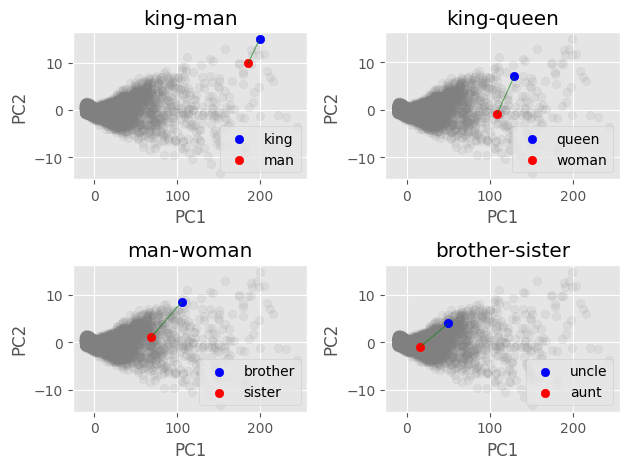

In [26]:
matrix = np.array(list(result_dict.values()))
matrix = np.squeeze(matrix)

# Apply PCA to the matrix
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(matrix)

# Create a dictionary that maps each word to its PCA coordinates
word_pca_dict = {word: word_vectors_pca[i] for i, word in enumerate(result_dict.keys())}

vector_pairs = {'king-man': ('king', 'man'), 
                'king-queen': ('queen', 'woman'),
                'man-woman': ('brother', 'sister'),
                'brother-sister': ('uncle', 'aunt'), 
                }

plt.style.use('ggplot')
for i, (pair_name, (w1, w2)) in enumerate(vector_pairs.items()):

    diff = result_dict[w1] - result_dict[w2]

    plt.subplot(2, 2, i+1)
    plt.scatter(word_vectors_pca[:,0], word_vectors_pca[:,1], alpha=0.1, color='gray')
    diff_pca = word_pca_dict[w1] - word_pca_dict[w2]
    plt.scatter(word_pca_dict[w1][0], word_pca_dict[w1][1], color='blue', label=w1)
    plt.scatter(word_pca_dict[w2][0], word_pca_dict[w2][1], color='red', label=w2)

    plt.arrow(word_pca_dict[w2][0], word_pca_dict[w2][1], 
              diff_pca[0], diff_pca[1], color='green', width=0.01, alpha=0.5)
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(pair_name)
    plt.legend()

plt.tight_layout()
plt.show()
